# Line plots

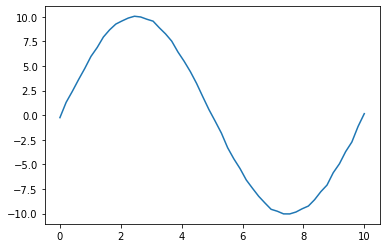

In [25]:
import matplotlib.pyplot as plt
import cortical_networks as cn


time, ts = cn.make_syn_data(n=50, model='sine', f=.1)
plt.plot(time, ts)

As you can see `plt.plot` returns a line object, which contains a lot of information and allows us to manipulate our figure, so we can assign it to a variable to use it later or we can suppress the output as we have seen in previous session.

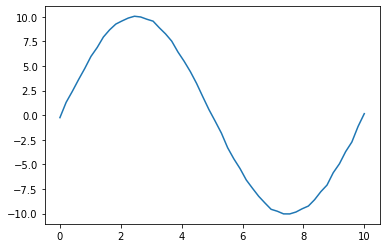

In [26]:
line = plt.plot(time, ts)

## line properties, markers

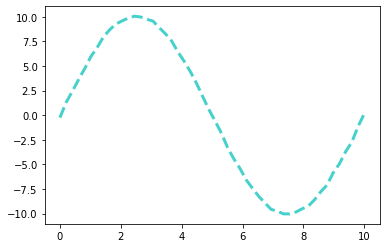

In [36]:
line = plt.plot(time, ts, linewidth=3, color='mediumturquoise', linestyle='--')

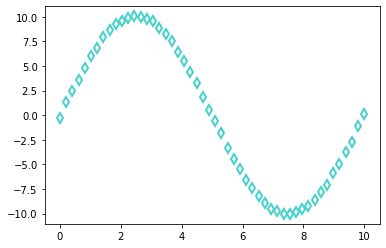

In [44]:
line_params = dict(linewidth=3, color='mediumturquoise', linestyle='',
                   marker='d', markersize=7, markerfacecolor='white', markeredgewidth=2)
line = plt.plot(time, ts, **line_params)

## limits, ticks, labels, title, spines

([<matplotlib.axis.XTick at 0x7fcc3f377110>,
 <a list of 3 Text xticklabel objects>)

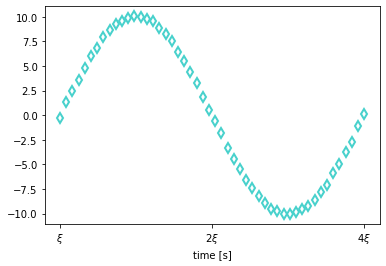

In [62]:
line = plt.plot(time, ts, **line_params)
plt.xlabel('time [s]')
plt.xticks([0, 5, 10], [r'$\xi$', r'2$\xi$', r'4$\xi$'])

In `matplotlib` many things can be achieved through functions (like `xticks`, `plot`, etc.) but to get the finest control over your visualization you'll need to use object properties. In general what you can do with functions can be done with the corresponding method of the right object. You can think of matplotlib visualizations as hierarchical constructs like trees with branches, sub-branches and leaves. It's actually quite simple when you get used to it: the root of the visualization is the figure, the figure contains axes, which are the spaces where we can plot lines, markers, etc. This is enough for now. You can create a figure and axes with the `plt.subplot()` function. You can also mix functions and objects in the code for a visualization (although it's better to keep the mixing at a minimum).

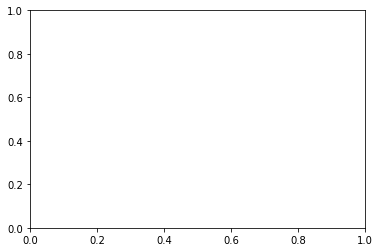

In [72]:
fig, ax = plt.subplots()

Of course there's nothing in it. Now we can use the methods of the axes object to achive the same result as before (methods to set properties of the axes usually begin with `set_`). 

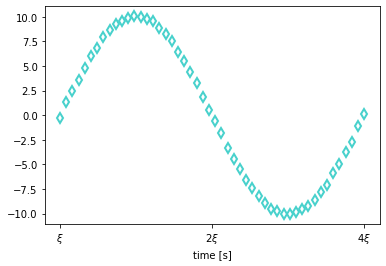

In [84]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_xticks([0, 5, 10])
ax.set_xticklabels([r'$\xi$', r'2$\xi$', r'4$\xi$']);

(0, 6)

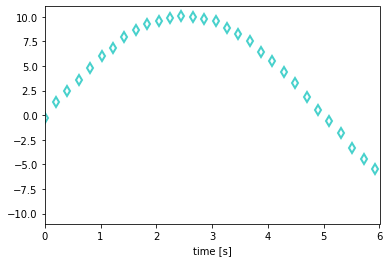

In [85]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_xlim([0, 6]);

Sometimes it's useful (in complex figures) to know the limits at some point in order to restore them later (this might be needed when some object added to the visualization changes the limits and we don't want it). 

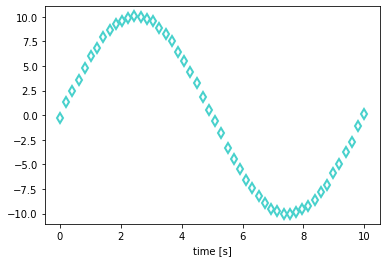

In [86]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
orig_xlims = ax.get_xlim()
ax.set_xlim([0, 6])
ax.set_xlim(orig_xlims);

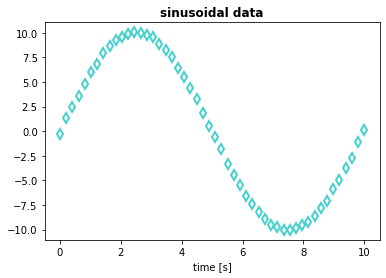

In [87]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold');

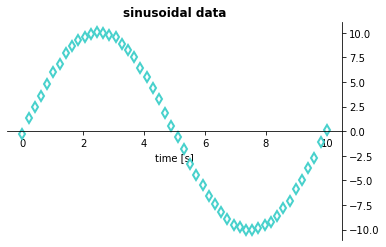

In [104]:
fig, ax = plt.subplots()
line = plt.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('right')
ax.spines['left'].set_position(('data', 10.5))

Sometimes you might just want to get the data without any reference point (ok, this one is really weird but you never know).

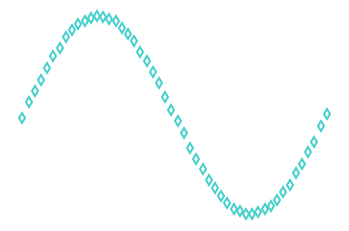

In [103]:
fig, ax = plt.subplots()
line = plt.plot(time, ts, **line_params)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([]);

## legend

Let's plot two lines with different frequencies and also a reference line at the 0 on y-axis.

We now want to know which line is which. So we add a legend.

As you will see `matplotlib` tries its best to place the legend in a place where it doesn't interfere with the visualization but sometimes you just want the legend to be in another place. For this you can use the `loc` parameter possibly together with the `bbox_to_anchor` parameter. The `loc` parameters locates the legend in the given position of a bounding box (which by default is the axes). The `bbox_to_anchor` defines that bounding box to anchor the legend arbitrarily using the tuple `(x, y, width, height)`, where `(0, 0, 1, 1)` is the whole axes. So you can place the legend wherever you wish.

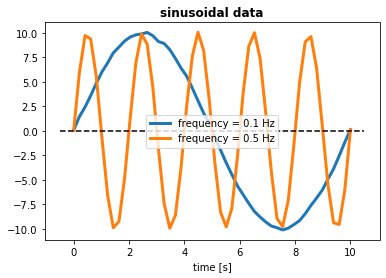

In [137]:
low_freq = 0.1
high_freq = 0.5
time, ts_lowfr = cn.make_syn_data(n=50, model='sine', f=low_freq)
time, ts_highfr = cn.make_syn_data(n=50, model='sine', f=high_freq)
fig, ax = plt.subplots()
line1 = ax.plot(time, ts_lowfr, linewidth=3, label='frequency = {:.1f} Hz'.format(low_freq))
line2 = ax.plot(time, ts_highfr, linewidth=3, label='frequency = {:.1f} Hz'.format(high_freq))
xlims = ax.get_xlim()
ref_line = ax.plot(xlims, [0, 0], c='black', ls='--')
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.legend();
#ax.legend(loc='lower left', bbox_to_anchor=(1, .5, .5, .5));

## annotations

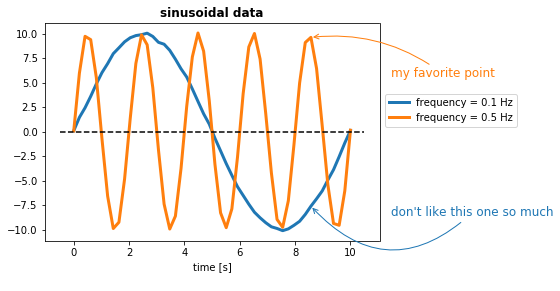

In [163]:
fig, ax = plt.subplots()
line1 = ax.plot(time, ts_lowfr, linewidth=3, label='frequency = {:.1f} Hz'.format(low_freq))
line2 = ax.plot(time, ts_highfr, linewidth=3, label='frequency = {:.1f} Hz'.format(high_freq))
xlims = ax.get_xlim()
ref_line = ax.plot(xlims, [0, 0], c='black', ls='--')
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.legend(loc='lower left', bbox_to_anchor=(1, .5, .5, .5))
ax.annotate('my favorite point', xy=(time[42], ts_highfr[42]),
             xycoords='data', xytext=(+80, -40), textcoords='offset points',
             fontsize=12, color=line2[0].get_color(), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2", color=line2[0].get_color()))
ax.annotate("don't like this one so much", xy=(time[42], ts_lowfr[42]),
             xycoords='data', xytext=(+80, -10), textcoords='offset points',
             fontsize=12, color=line1[0].get_color(), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5", color=line1[0].get_color()));


# Figures, subplots, axes

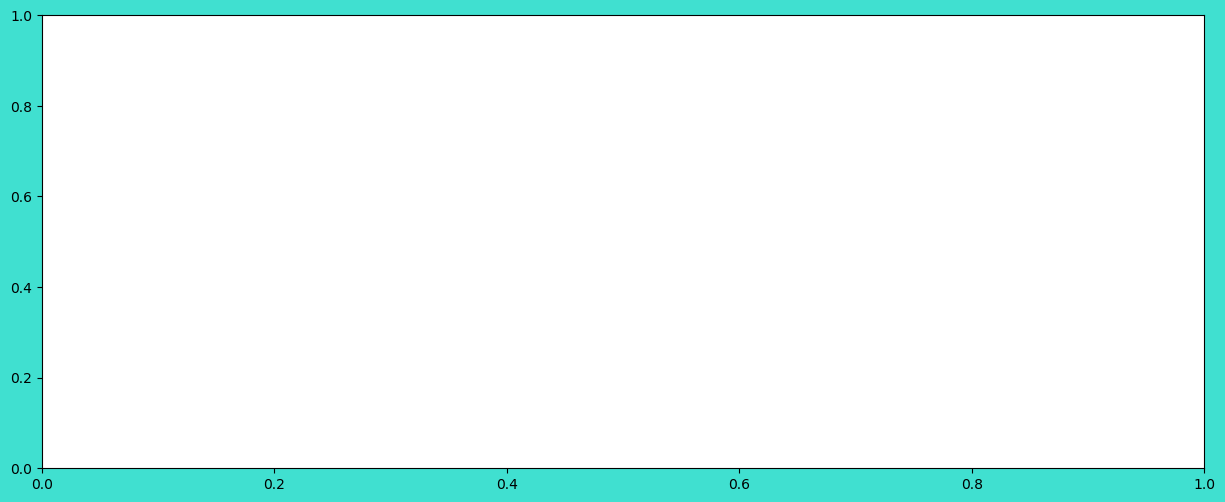

In [177]:
fig, ax = plt.subplots(figsize=[15, 6], dpi=100, facecolor='turquoise')

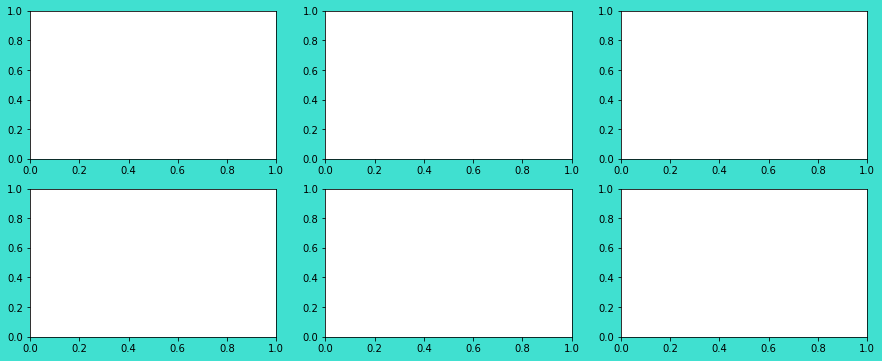

In [179]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[15, 6], facecolor='turquoise')

## link axis

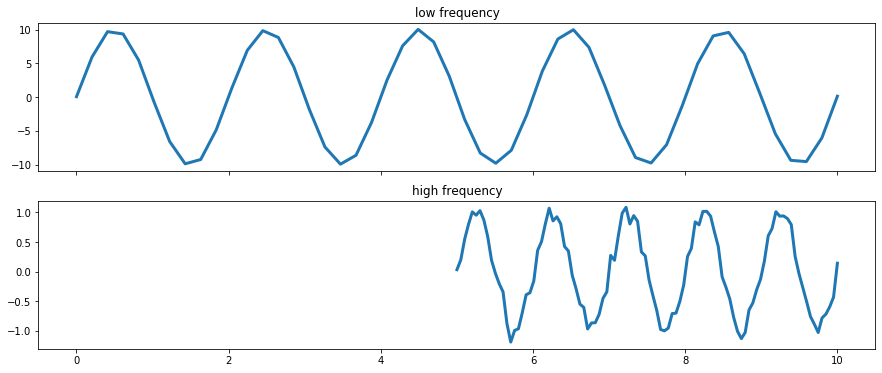

In [188]:
time_s, ts_short = cn.make_syn_data(n=100, model='sine', f=1, xlow=5)
fig, axs = plt.subplots(nrows=2, figsize=[15, 6], sharex=True)
axs[0].plot(time, ts_highfr, lw=3)
axs[1].plot(time_s, ts_short, lw=3)
axs[0].set_title('low frequency')
axs[1].set_title('high frequency');

## double axis

A double axis is useful when you want to show data that "live in the same space", for example are sampled in the same time period but are totally different quantities with different scales. In this case a second axes can be created that shares the bounding box with a preexisting axes and either the x or y axis.

For the sake of the example let's create another series of data with a different amplitude.

The main line to get the double axis here is just `ax2 = ax.twinx()`. The rest of the code is just to get a nicer correspondence of color between data and axis.

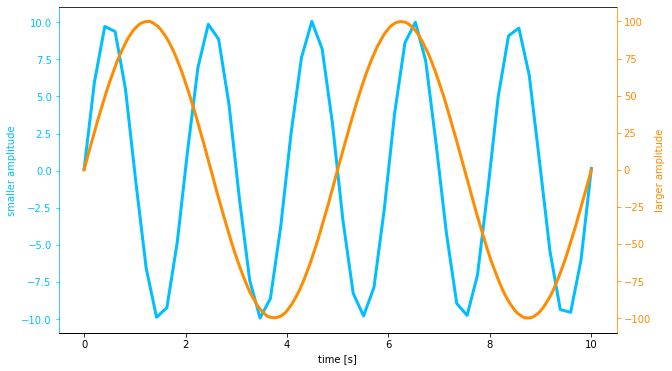

In [225]:
time_new, ts_new = cn.make_syn_data(n=200, model='sine', f=.2, a=100)

fig, ax = plt.subplots( figsize=[10, 6], sharex=True)
line1 = ax.plot(time, ts_highfr, lw=3, color='deepskyblue')
ax.set_xlabel('time [s]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

line2 = ax2.plot(time_new, ts_new, lw=3, color='darkorange')
ax2_col = line2[0].get_color()
ax2.set_ylabel('larger amplitude', color=ax2_col)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=ax2_col, color=ax2_col)
ax_col = line1[0].get_color()
ax.set_ylabel('smaller amplitude', color=ax_col)  # we already handled the x-label with ax1
ax.tick_params(axis='y', labelcolor=ax_col, color=ax_col)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_color(ax_col)
ax2.spines['right'].set_color(ax2_col)

## insets and fancy axes

## subplots grid

# seaborn

# Scatter plot

# Bar plot

# Contour plot

# imshow

# Pie chart

# Violins and box plots

# Summary of good viz practices